# Image differencing tests



In [79]:
%matplotlib notebook
import numpy as np
import numpy.random
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.colors
verbose = 1
# Development copy of lsst/ip/diffim/tests/test_subtractExposures.py
%run -n -i "test_image_subtraction.py"

In [80]:
T = SubtractionTest()

All good case.

In [91]:
T.setUpImages(spsf=3.3,tpsf=2.2)
T.runSubtractionSimple()

Science PSF: [3.3, 3.3] 0.0
Template PSF: [2.2, 2.2] 0.0
2.459674775249768
Offset: [0.0, 0.0]
PSF y spatial-variation: -0.0 -0.0


<IPython.core.display.Javascript object>


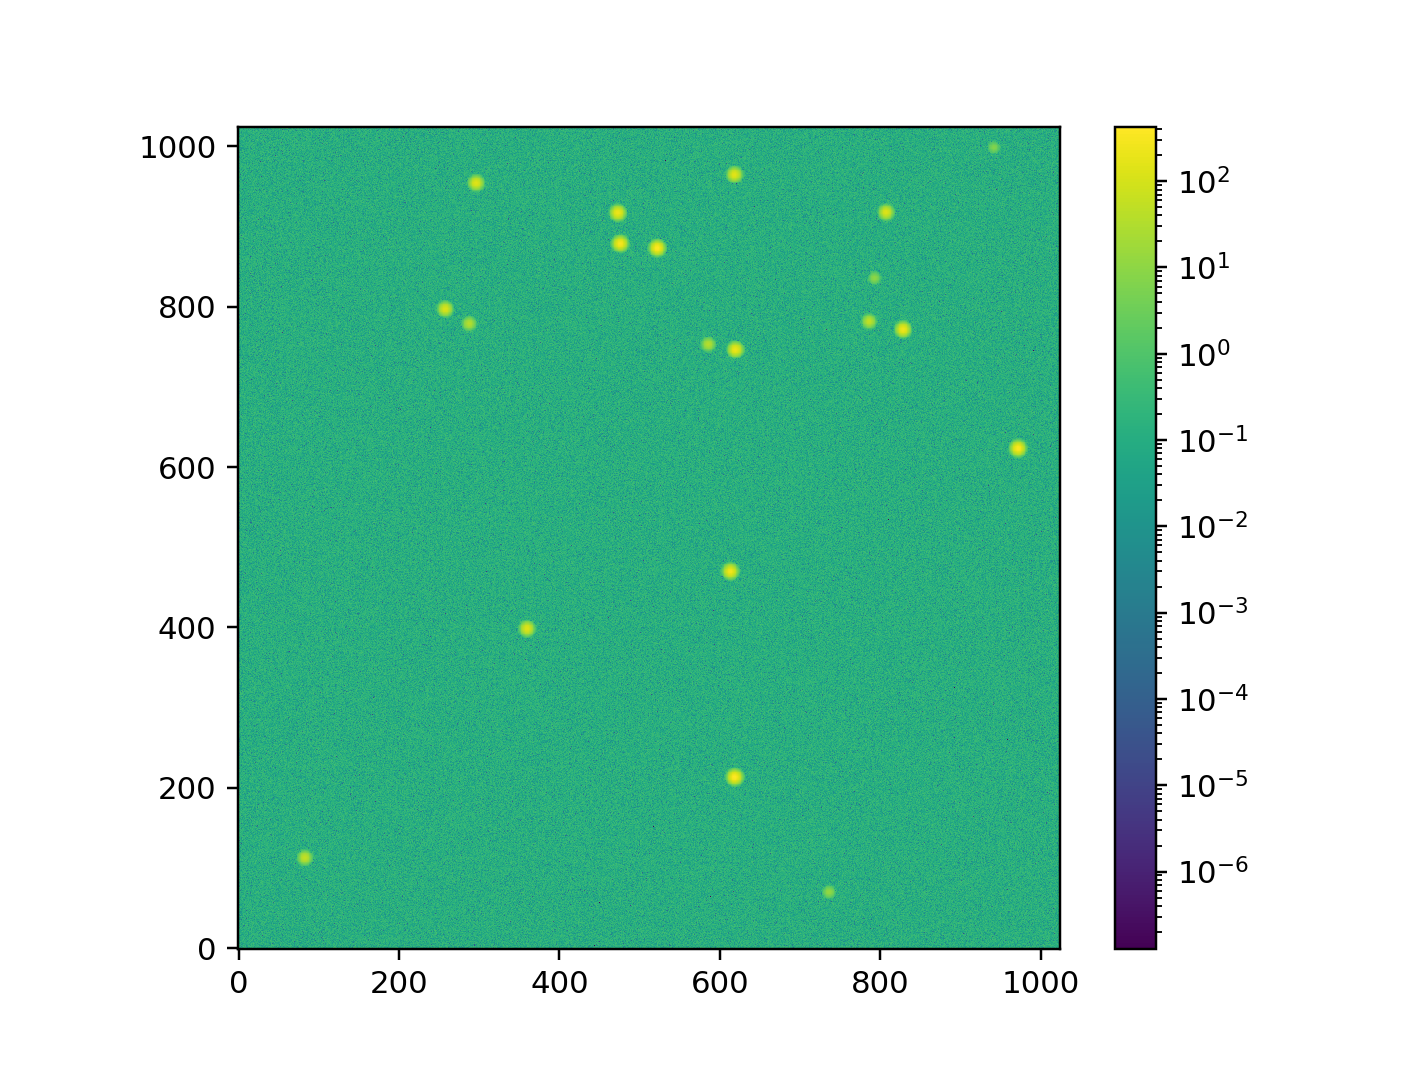

<IPython.core.display.Javascript object>


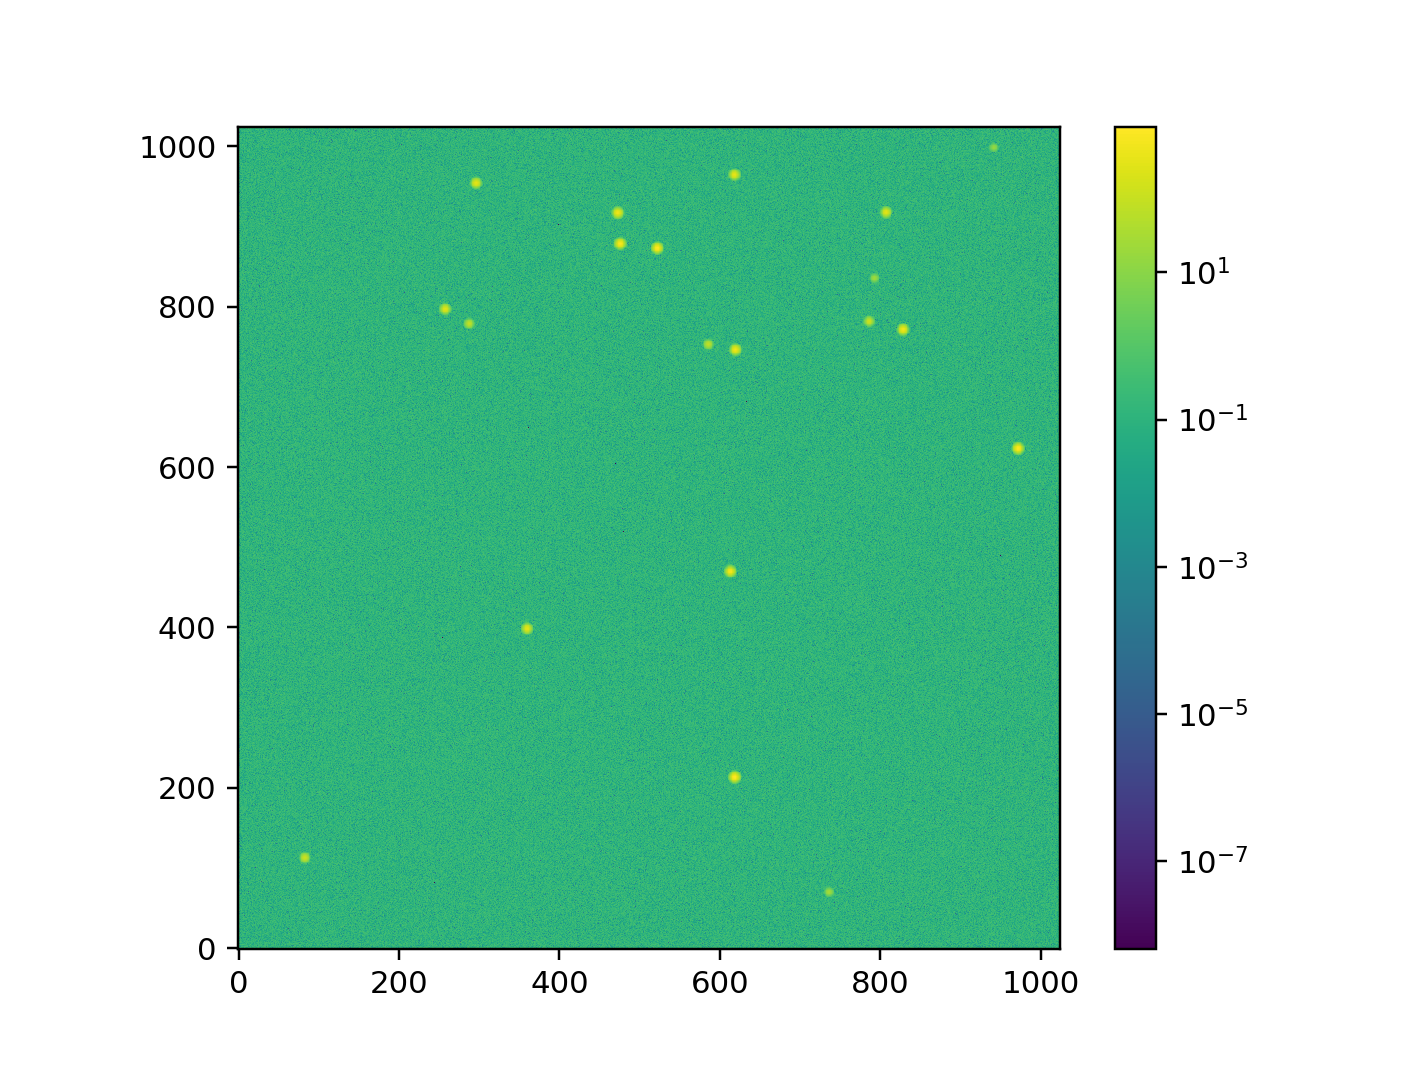

In [92]:
imS = T.im1ex.getImage()
imT = T.im2ex.getImage()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cs = ax.imshow(np.abs(imS.getArray())+1e-10,interpolation='none',origin='bottom',norm=matplotlib.colors.LogNorm())
fig.colorbar(cs)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cs = ax.imshow(np.abs(imT.getArray())+1e-10,interpolation='none',origin='bottom',norm=matplotlib.colors.LogNorm())
fig.colorbar(cs)

<IPython.core.display.Javascript object>


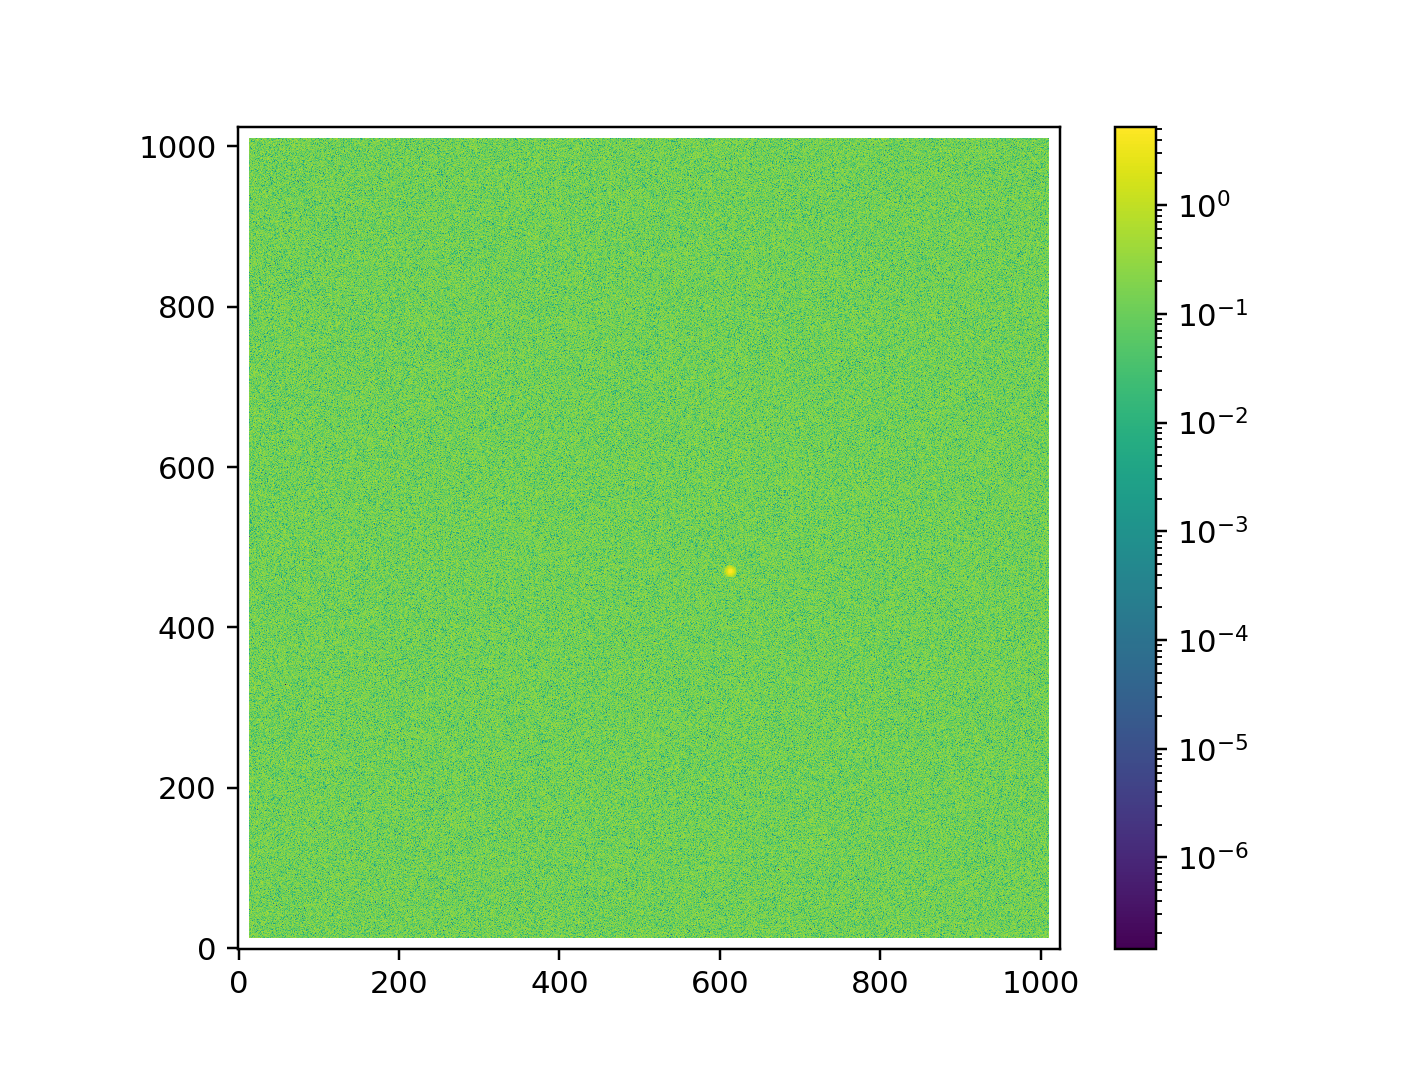

In [93]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
subsArr = T.results1.subtractedExposure.getMaskedImage().getImage().getArray()
cs = ax.imshow(np.abs(subsArr)+1e-10,origin='bottom',norm=matplotlib.colors.LogNorm())
fig.colorbar(cs)

(minimum=(0, 0), maximum=(1023, 1023))


<IPython.core.display.Javascript object>


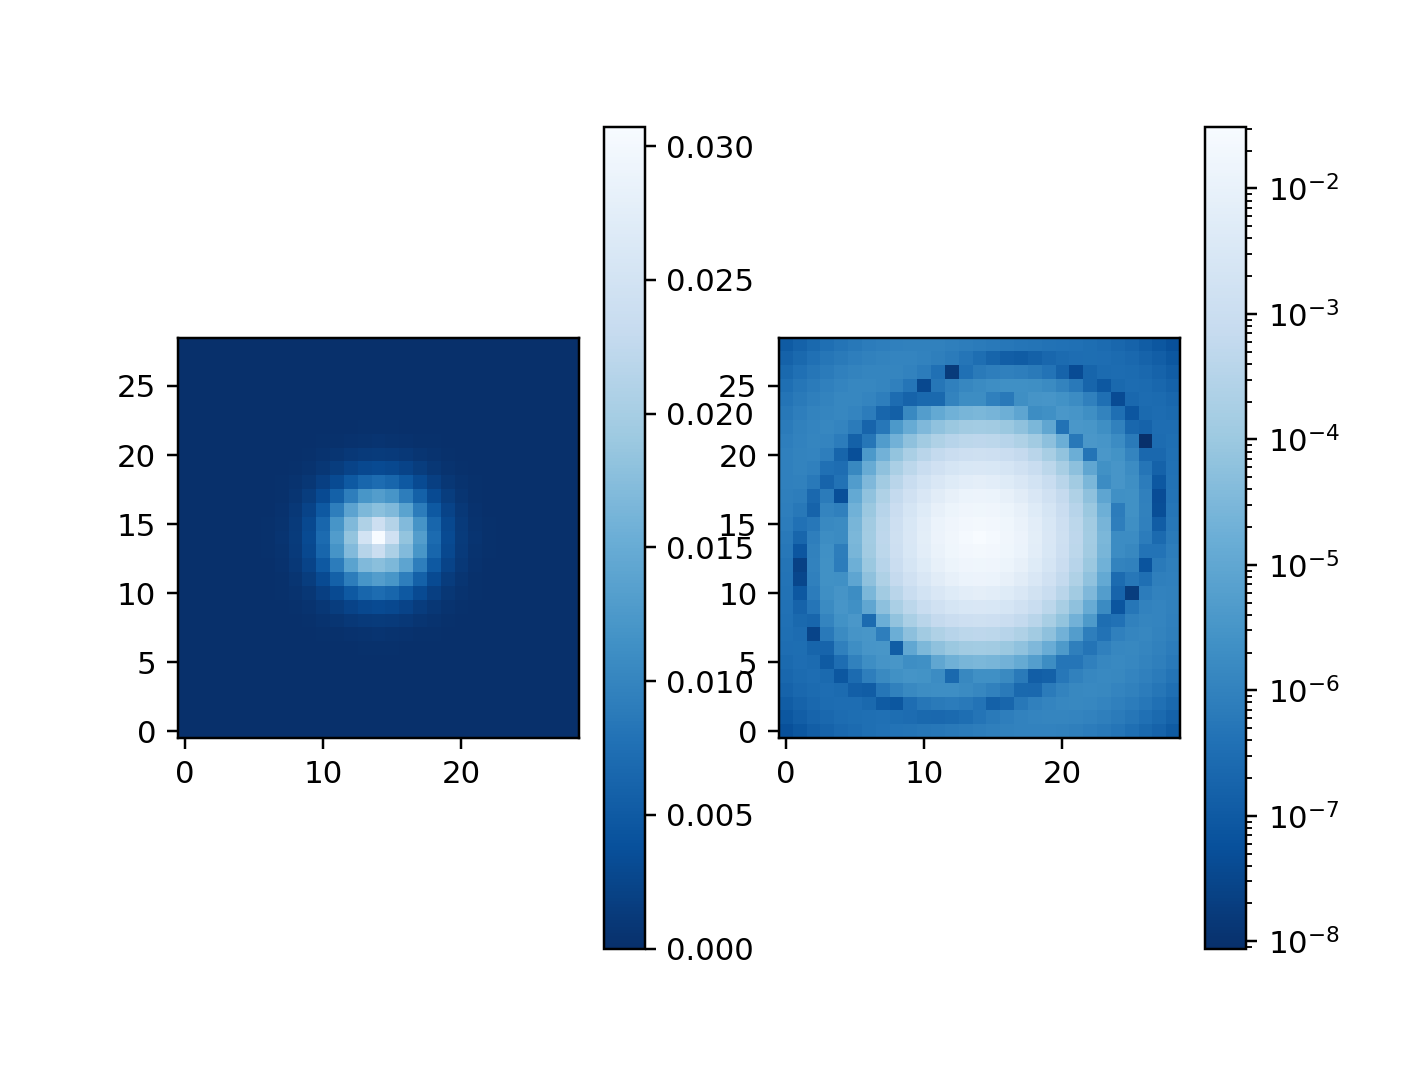

In [94]:
#T.results1.psfMatchingKernel.computeImage(512,512)
kImg = afwImage.ImageD(T.results1.psfMatchingKernel.getDimensions())
print(T.results1.subtractedExposure.getBBox())
T.results1.psfMatchingKernel.computeImage(kImg,False,512,512)

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
kArr = kImg.getArray()
cs = ax.imshow(kArr,origin='bottom',cmap='Blues_r')
fig.colorbar(cs)

ax = fig.add_subplot(1,2,2)
cs = ax.imshow(np.abs(kArr)+1e-10,origin='bottom',cmap='Blues_r',norm=matplotlib.colors.LogNorm())
fig.colorbar(cs)

(minimum=(0, 0), maximum=(1023, 1023))


<IPython.core.display.Javascript object>


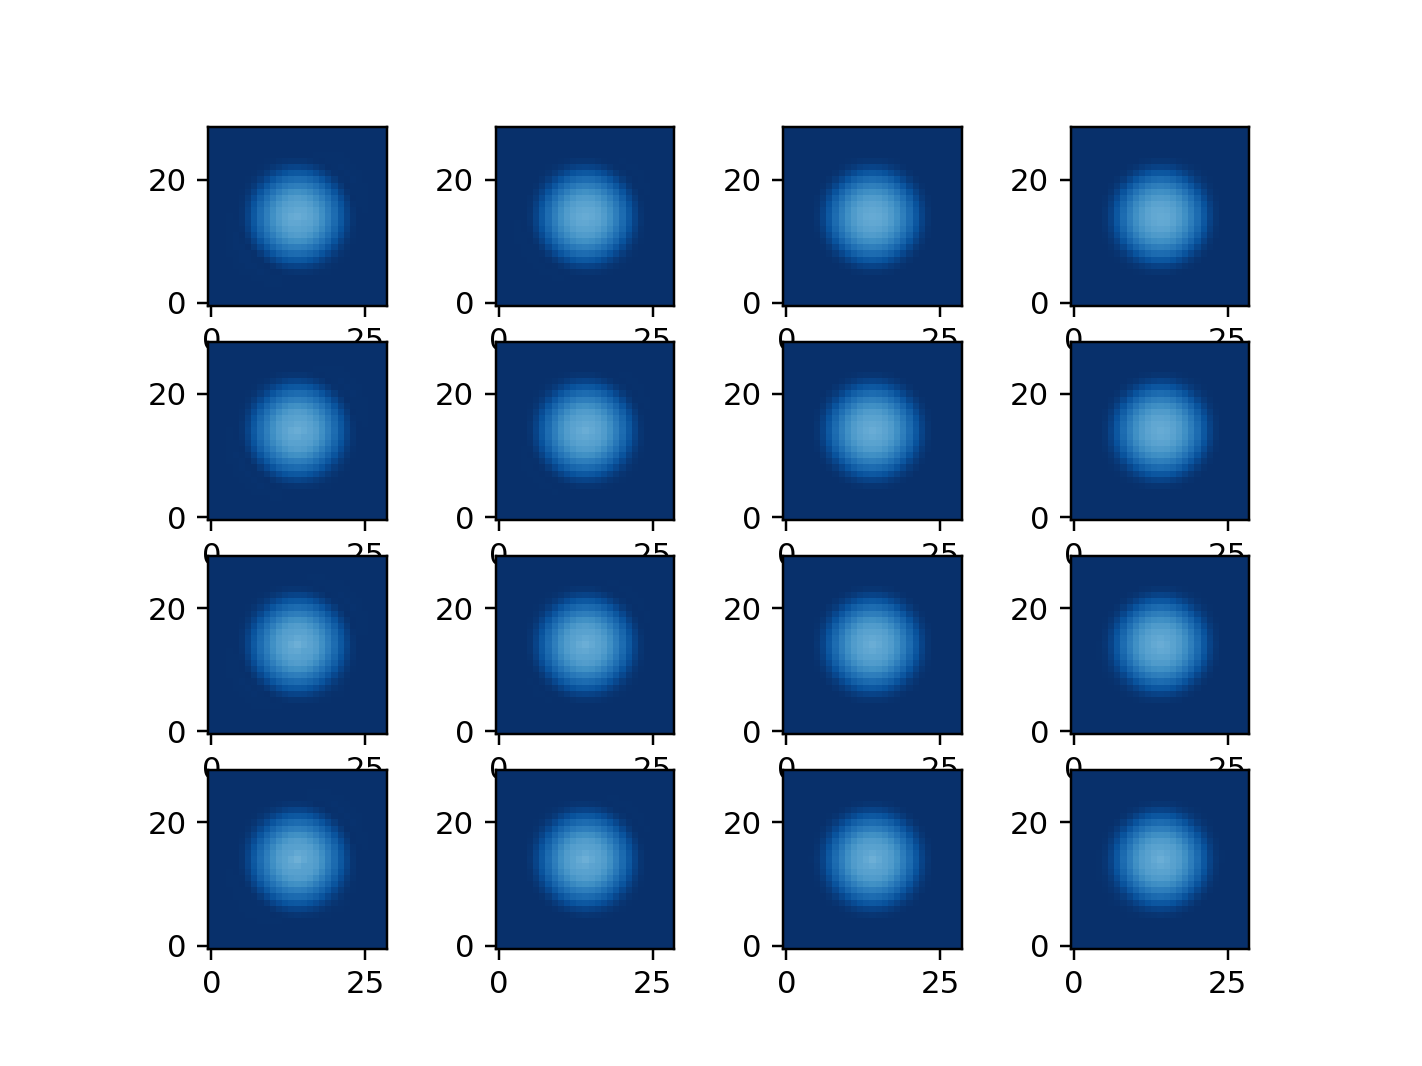

In [95]:
xx, yy = np.meshgrid ((10,340,680,1000),(10,340,680,1000))
sh = xx.shape
xx = xx.ravel()
yy = yy.ravel()

print(T.results1.subtractedExposure.getBBox())
fig = plt.figure()
for i in range(len(xx)):
    ax = fig.add_subplot(sh[0],sh[1],i+1)
    kImg = afwImage.ImageD(T.results1.psfMatchingKernel.getDimensions())
    T.results1.psfMatchingKernel.computeImage(kImg,False,xx[i],yy[i])
    kArr = kImg.getArray()
    cs = ax.imshow(np.abs(kArr)+1e-4,origin='bottom',cmap='Blues_r',norm=matplotlib.colors.LogNorm(),vmin=1e-4,vmax=10)


Close matching case, no distortion, no offset

In [96]:
T.setUpImages(spsf=2.22,tpsf=2.2)
T.runSubtractionSimple()

Science PSF: [2.22, 2.22] 0.0
Template PSF: [2.2, 2.2] 0.0
0.2973213749463702
Offset: [0.0, 0.0]
PSF y spatial-variation: -0.0 -0.0


<IPython.core.display.Javascript object>


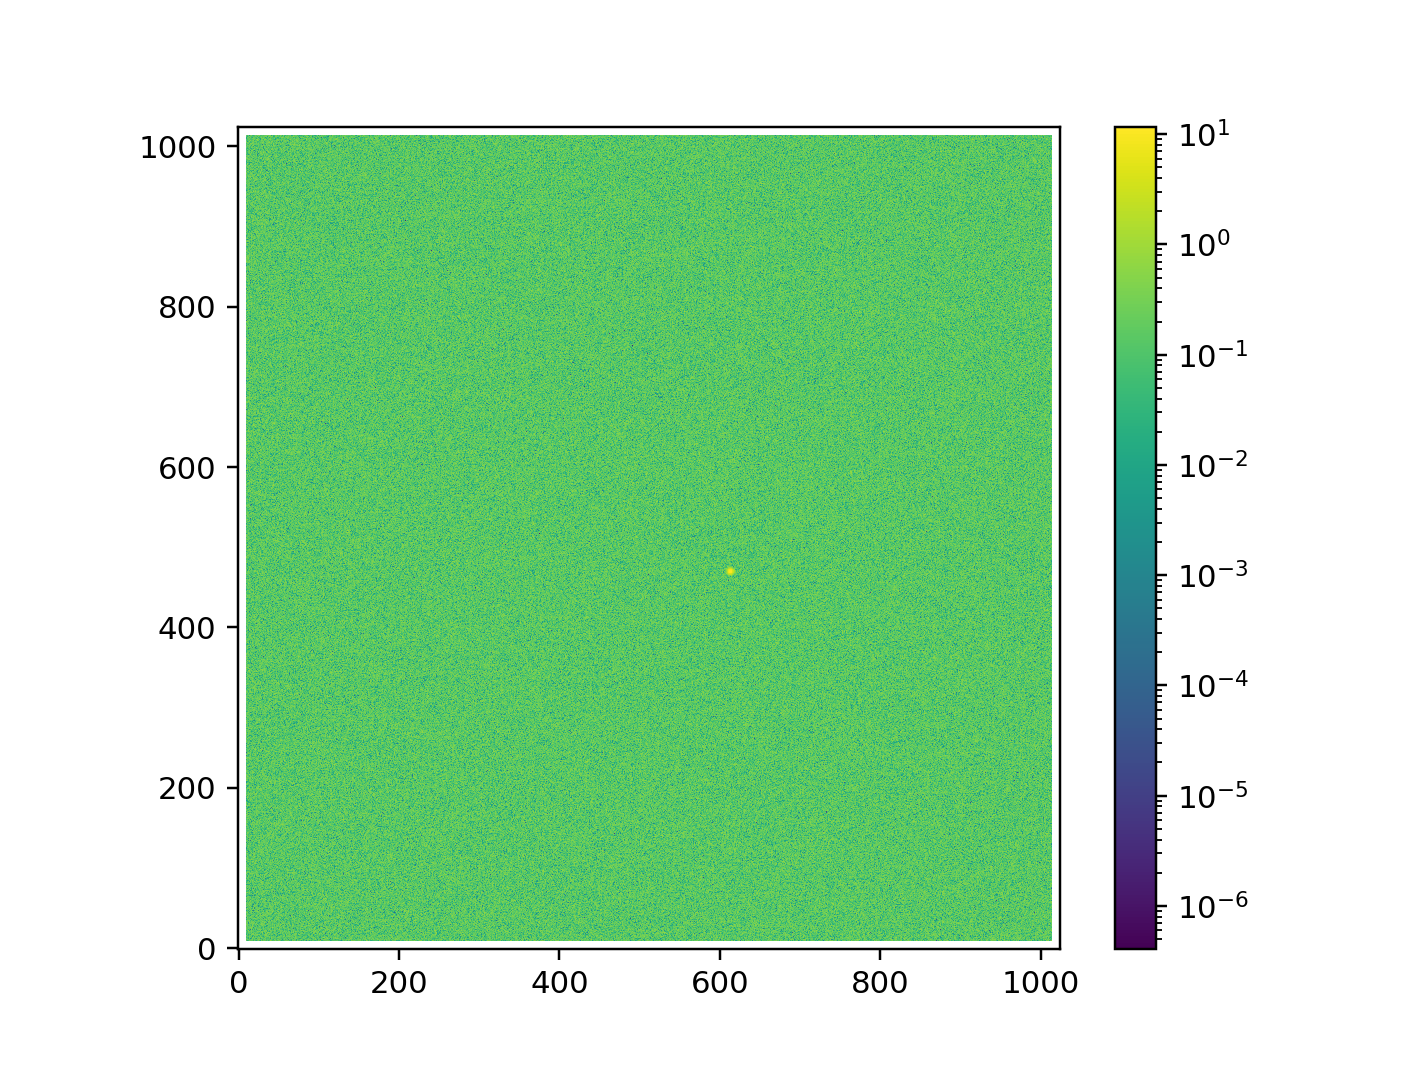

In [97]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
subsArr = T.results1.subtractedExposure.getMaskedImage().getImage().getArray()
cs = ax.imshow(np.abs(subsArr),origin='bottom',norm=matplotlib.colors.LogNorm())
fig.colorbar(cs)

(minimum=(0, 0), maximum=(1023, 1023))


<IPython.core.display.Javascript object>


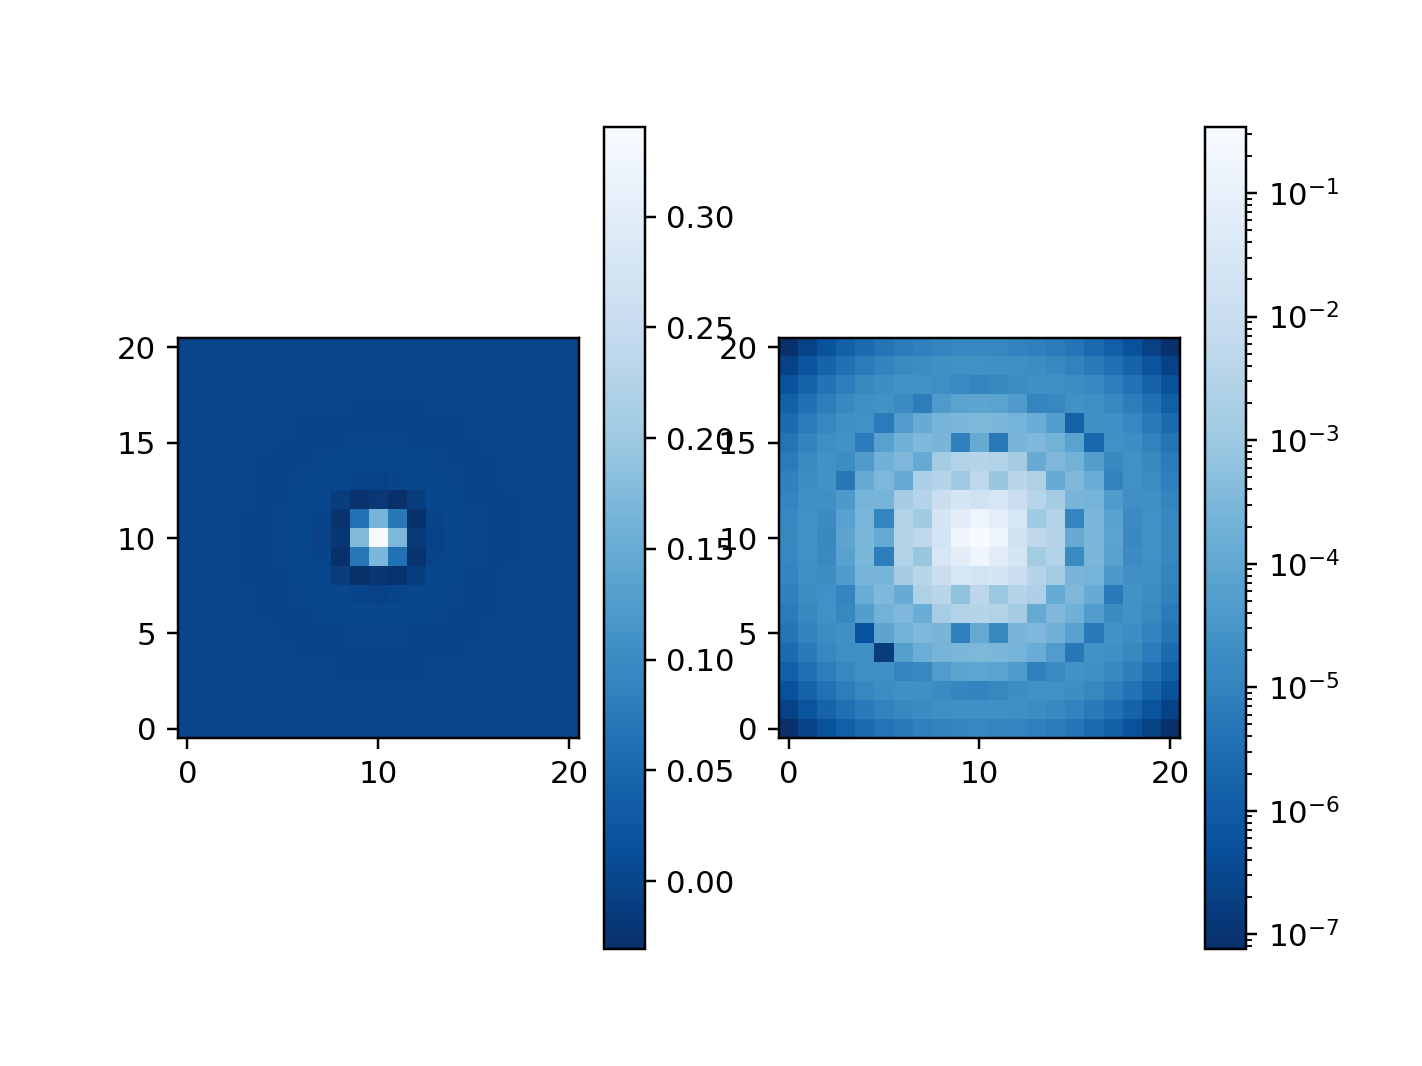

In [98]:
#T.results1.psfMatchingKernel.computeImage(512,512)
kImg = afwImage.ImageD(T.results1.psfMatchingKernel.getDimensions())
print(T.results1.subtractedExposure.getBBox())
T.results1.psfMatchingKernel.computeImage(kImg,False,512,512)

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
kArr = kImg.getArray()
cs = ax.imshow(kArr,origin='bottom',cmap='Blues_r')
fig.colorbar(cs)

ax = fig.add_subplot(1,2,2)
cs = ax.imshow(np.abs(kArr)+1e-10,origin='bottom',cmap='Blues_r',norm=matplotlib.colors.LogNorm())
fig.colorbar(cs)

(minimum=(0, 0), maximum=(1023, 1023))


<IPython.core.display.Javascript object>


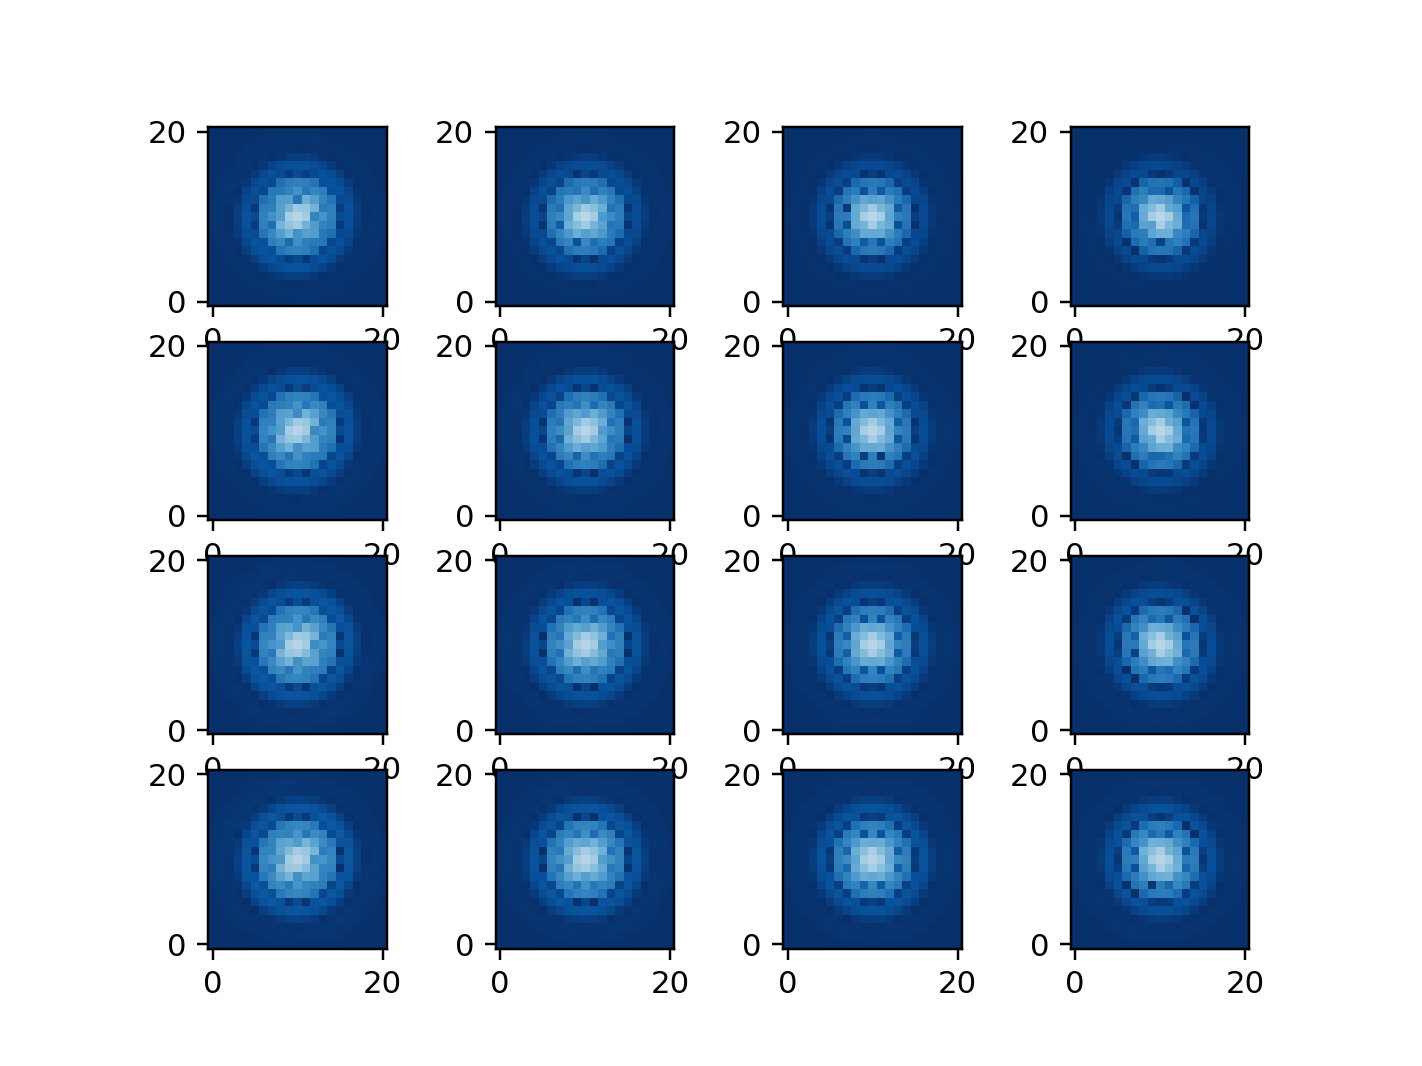

In [99]:
xx, yy = np.meshgrid ((10,340,680,1000),(10,340,680,1000))
sh = xx.shape
xx = xx.ravel()
yy = yy.ravel()

print(T.results1.subtractedExposure.getBBox())
fig = plt.figure()
for i in range(len(xx)):
    ax = fig.add_subplot(sh[0],sh[1],i+1)
    kImg = afwImage.ImageD(T.results1.psfMatchingKernel.getDimensions())
    T.results1.psfMatchingKernel.computeImage(kImg,False,xx[i],yy[i])
    kArr = kImg.getArray()
    cs = ax.imshow(np.abs(kArr)+1e-4,origin='bottom',cmap='Blues_r',norm=matplotlib.colors.LogNorm(),vmin=1e-4,vmax=10)


y offset, no close match
In case of close match, subtraction sometimes fails completely.

In [102]:
#T.setUpImages(spsf=2.22,tpsf=2.,varyPsf=1.)
T.setUpImages(spsf=3.,tpsf=2.,varyPsf=1.)
T.runSubtractionSimple()

Science PSF: [3.0, 3.0] 0.0
Template PSF: [2.0, 2.0] 0.0
2.23606797749979
Offset: [0.0, 0.0]
PSF y spatial-variation: -0.9517563685265699 0.863072418787486


<IPython.core.display.Javascript object>


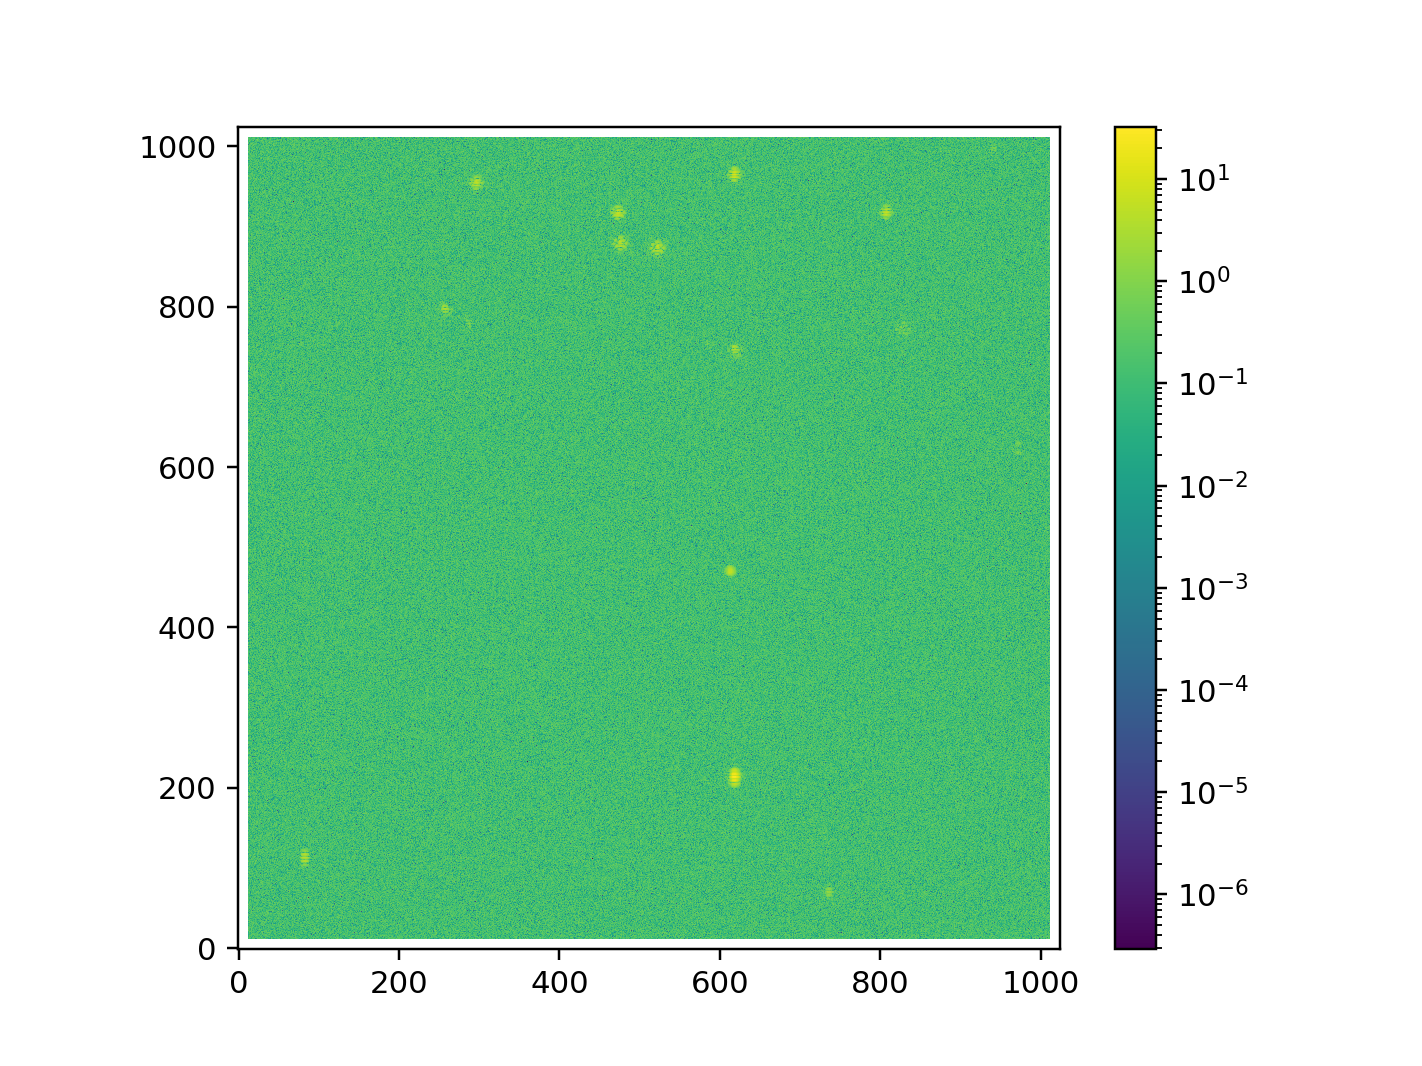

In [103]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
subsArr = T.results1.subtractedExposure.getMaskedImage().getImage().getArray()
cs = ax.imshow(np.abs(subsArr),origin='bottom',norm=matplotlib.colors.LogNorm())
fig.colorbar(cs)

(minimum=(0, 0), maximum=(1023, 1023))


<IPython.core.display.Javascript object>


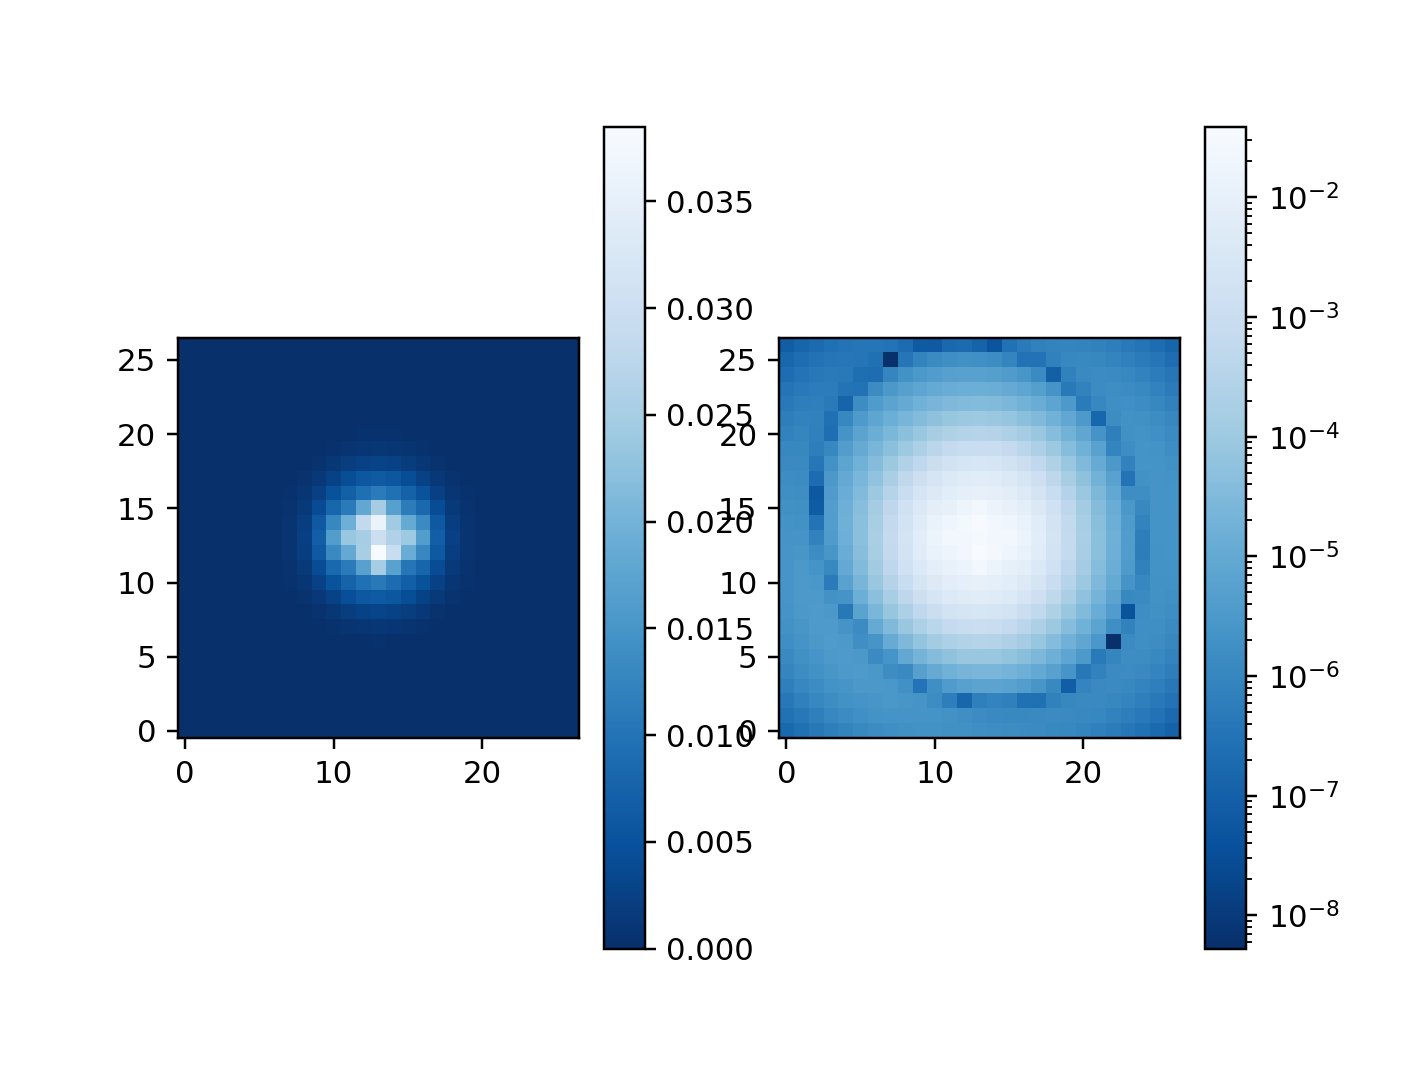

In [104]:
#T.results1.psfMatchingKernel.computeImage(512,512)
kImg = afwImage.ImageD(T.results1.psfMatchingKernel.getDimensions())
print(T.results1.subtractedExposure.getBBox())
T.results1.psfMatchingKernel.computeImage(kImg,False,512,512)

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
kArr = kImg.getArray()
cs = ax.imshow(kArr,origin='bottom',cmap='Blues_r')
fig.colorbar(cs)

ax = fig.add_subplot(1,2,2)
cs = ax.imshow(np.abs(kArr)+1e-10,origin='bottom',cmap='Blues_r',norm=matplotlib.colors.LogNorm())
fig.colorbar(cs)

(minimum=(0, 0), maximum=(1023, 1023))


<IPython.core.display.Javascript object>


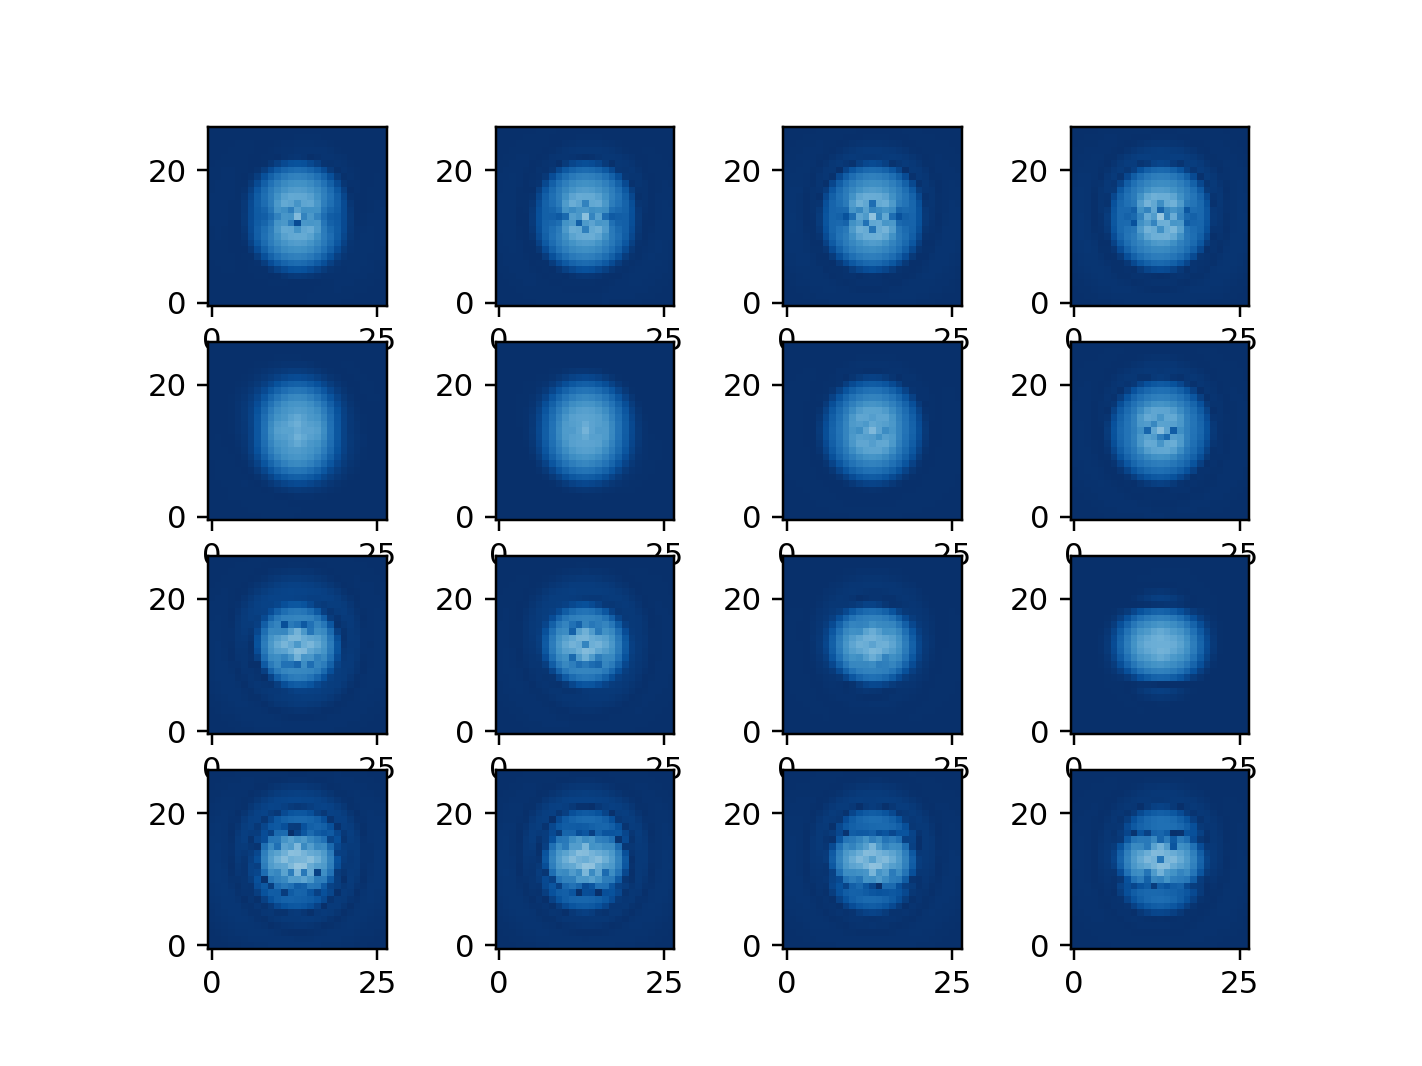

In [105]:
xx, yy = np.meshgrid ((10,340,680,1000),(10,340,680,1000))
sh = xx.shape
xx = xx.ravel()
yy = yy.ravel()

print(T.results1.subtractedExposure.getBBox())
fig = plt.figure()
for i in range(len(xx)):
    ax = fig.add_subplot(sh[0],sh[1],i+1)
    kImg = afwImage.ImageD(T.results1.psfMatchingKernel.getDimensions())
    T.results1.psfMatchingKernel.computeImage(kImg,False,xx[i],yy[i])
    kArr = kImg.getArray()
    cs = ax.imshow(np.abs(kArr)+1e-4,origin='bottom',cmap='Blues_r',norm=matplotlib.colors.LogNorm(),vmin=1e-4,vmax=10)
